In [1]:
# 1. SET GLOBAL PATH 
import sys
path2oti = '../../../build'
sys.path.append(path2oti) # Add path to OTI library.
# path2mdl = '/Users/mauriaristi/Documents/src/multi-z/Python/'
# sys.path.append(path2mdl) # Add path to MDL library.


import pyoti.dense as oti
eps = oti.e
from pyoti.core import imdir

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt


In [2]:


def F(x,y):

    return 1 -  (x**2-y**2) / (x**2+y**2)**2,  -2*x*y/(x**2+y**2)**2

def F_eval(X):
    x = X[0]
    y = X[1]
    return 1 -  (x**2-y**2) / (x**2+y**2)**2,  -2*x*y/(x**2+y**2)**2

In [3]:
# Set global truncation order
oti.set_trunc_order(5)

# Define OTI variables
x = -1 + 0*eps(1,nbases = 1, order = 5) 
y =  2 + 0*eps(1,nbases = 1, order = 5)

In [4]:
x, dt = ode_comp_F_derivs(F_eval,[-1,2],eps=1e-6,order = 5)
print("x: ",x)
print("dt: ",dt)
X(dt,x)


NameError: name 'ode_comp_F_derivs' is not defined

In [57]:
print("x: ",x)
print("y: ",y)

x:  [-1 + 1.12 * e([1]) + 0.096 * e([[1,2]]) + 0.00597333 * e([[1,3]]) - 0.0208384 * e([[1,4]]) - 0.00950299 * e([[1,5]]), 2 + 0.16 * e([1]) - 0.032 * e([[1,2]]) - 0.0503467 * e([[1,3]]) - 0.0121685 * e([[1,4]]) + 0.00703338 * e([[1,5]])]
y:  2 + 0 * e([1]) + 0 * e([[1,2]]) + 0 * e([[1,3]]) + 0 * e([[1,4]]) + 0 * e([[1,5]])


In [58]:
x_t, y_t = F(x,y)
print("x_t: ",x_t)
print("y_t: ",y_t)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [54]:
x[imdir([1])] = x_t[imdir([0])]
y[imdir([1])] = y_t[imdir([0])]

print("x: ",x)
print("y: ",y)

NameError: name 'x_t' is not defined

In [55]:
x_t, y_t = F(x,y)
print("x_t: ",x_t)
print("y_t: ",y_t)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [56]:
x[imdir([[1,2]])] = x_t[imdir([1])]/2
y[imdir([[1,2]])] = y_t[imdir([1])]/2
print("x: ",x)
print("y: ",y)

NameError: name 'x_t' is not defined

In [57]:
x_t, y_t = F(x,y)
print("x_t: ",x_t)
print("y_t: ",y_t)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [58]:
x[imdir([[1,3]])] = x_t[imdir([[1,2]])]/3
y[imdir([[1,3]])] = y_t[imdir([[1,2]])]/3
print("x: ",x)
print("y: ",y)

NameError: name 'x_t' is not defined

In [59]:
x_t, y_t = F(x,y)
print("x_t: ",x_t)
print("y_t: ",y_t)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [60]:
x[imdir([[1,4]])] = x_t[imdir([[1,3]])]/4
y[imdir([[1,4]])] = y_t[imdir([[1,3]])]/4
print("x: ",x)
print("y: ",y)

NameError: name 'x_t' is not defined

In [61]:
x_t, y_t = F(x,y)
print("x_t: ",x_t)
print("y_t: ",y_t)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [62]:
x[imdir([[1,5]])] = x_t[imdir([[1,4]])]/5
y[imdir([[1,5]])] = y_t[imdir([[1,4]])]/5
print("x: ",x)
print("y: ",y)

NameError: name 'x_t' is not defined

In [63]:
def X(t,x,y,order = None):
    x_derivs = x.get_all_deriv()
    y_derivs = y.get_all_deriv()
    
    x_val = 0.0
    y_val = 0.0
    
    if order is not None:
        iters = order+1
    else : 
        iters = len(x_derivs)
    # end if 
    
    
    for i in range(iters):
        x_val += x[[0,i]]*t**i
        y_val += y[[0,i]]*t**i
    return [x_val,y_val]
        

In [64]:
x.get_all_deriv()

AttributeError: 'list' object has no attribute 'get_all_deriv'

In [65]:

x_t[imdir([[1,5]])]

NameError: name 'x_t' is not defined

In [66]:
y_t[imdir([[1,5]])]

NameError: name 'y_t' is not defined

In [67]:
X(0,x,y)


AttributeError: 'list' object has no attribute 'get_all_deriv'

In [68]:
X(1.5,x,y)

AttributeError: 'list' object has no attribute 'get_all_deriv'

In [69]:
t_vals = np.arange(0,2,0.01)
X_vals = np.zeros((t_vals.size,2))
i=0
for t in t_vals:
    
    X_vals[i] = X(t,x,y)
    i+=1
    

AttributeError: 'list' object has no attribute 'get_all_deriv'

In [70]:
t_vals = np.arange(0,2,0.01)
X_vals4 = np.zeros((t_vals.size,2))
i=0
for t in t_vals:
    
    X_vals4[i] = X(t,x,y, order = 4)
    i+=1

AttributeError: 'list' object has no attribute 'get_all_deriv'

In [25]:
t_vals = np.arange(0,2,0.01)
X_vals3 = np.zeros((t_vals.size,2))
i=0
for t in t_vals:
    
    X_vals3[i] = X(t,x,y, order = 3)
    i+=1

In [26]:
X_vals

array([[-1.        ,  2.        ],
       [-0.88703621,  2.01562851],
       [-0.7721486 ,  2.03030001],
       [-0.6553906 ,  2.04367917],
       [-0.53688848,  2.05541832],
       [-0.4168527 ,  2.06516593],
       [-0.29558937,  2.07257499],
       [-0.17351161,  2.07731153],
       [-0.051151  ,  2.07906297],
       [ 0.07083106,  2.07754664],
       [ 0.19163194,  2.07251818],
       [ 0.31029634,  2.06377996],
       [ 0.42570493,  2.05118958],
       [ 0.53656291,  2.03466827],
       [ 0.64138865,  2.0142093 ],
       [ 0.73850225,  1.98988652],
       [ 0.82601413,  1.96186267],
       [ 0.90181367,  1.93039793],
       [ 0.96355778,  1.89585831],
       [ 1.00865946,  1.85872408],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,

//anaconda3/envs/pyoti/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


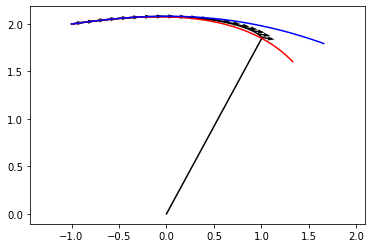

In [28]:
plt.figure()

plt.plot(X_vals[:,0],X_vals[:,1],'k')
plt.plot(X_vals4[:,0],X_vals4[:,1],'r')
plt.plot(X_vals3[:,0],X_vals3[:,1],'b')
U, V = F(X_vals[:,0],X_vals[:,1])
plt.quiver(X_vals[:,0],X_vals[:,1],U,V)
plt.axis("equal")
plt.show()

In [29]:
U

array([1.12      , 1.13929119, 1.15837756, 1.17661011, 1.19327704,
       1.2076528 , 1.2190608 , 1.22694324, 1.23092776, 1.23087892,
       1.22692375, 1.21944517, 1.209044  , 1.19647733, 1.18258641,
       1.16822898, 1.15422923, 1.14135477, 1.13032671, 1.1218669 ,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

In [132]:
V.shape

(200,)

In [136]:
X_vals[:,0].shape

(200,)

In [106]:
X0 = [-1,2]
x, dt_est = ode_comp_F_derivs(F_eval,X0,eps=1e-6,order = 5)
print("x: ",x)
print("dt: ",dt_est)
x1 = X(dt_est,x)

Error:  [0.00121182 0.0055744 ]
x:  [-1 + 1.12 * e([1]) + 0.096 * e([[1,2]]) + 0.00597333 * e([[1,3]]) - 0.0208384 * e([[1,4]]) - 0.00950299 * e([[1,5]]), 2 + 0.16 * e([1]) - 0.032 * e([[1,2]]) - 0.0503467 * e([[1,3]]) - 0.0121685 * e([[1,4]]) + 0.00703338 * e([[1,5]])]
dt:  0.7082467146133501


In [107]:
t_vals = np.arange(0,dt_est,dt_est/200)
X_vals = np.zeros((t_vals.size,2))
i=0
for t in t_vals:
    
    X_vals[i] = X(t,x)
    i+=1

<IPython.core.display.Javascript object>


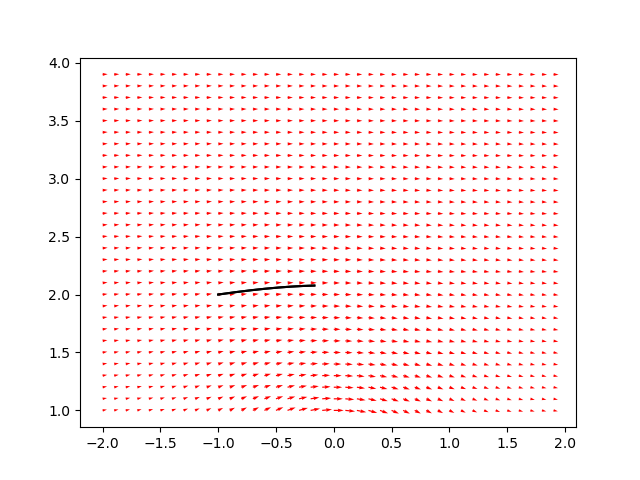

In [108]:
plt.figure()

plt.plot(X_vals[:,0],X_vals[:,1],'k')
plt.plot(X_vals[:,0],X_vals[:,1],'k')

x_grid = np.arange(-2,2,0.1)
y_grid = np.arange(1.0,4,0.1)

X_grid,Y_grid = np.meshgrid(x_grid,y_grid)

U, V = F_eval([X_grid,Y_grid])
plt.quiver(X_grid,Y_grid,U,V,scale=100,color='r')
plt.axis("equal")
plt.show()

In [109]:
dt = 1e-6
x1 = X0.copy()

nevals = int(dt_est//dt)
x_diff = np.zeros((nevals,2))

for i in range(nevals):
    df    = F_eval(x1)
    x1[0] = x1[0]+df[0]*dt
    x1[1] = x1[1]+df[1]*dt
    
    x_diff[i] = x1
    
#



In [110]:
dt_est//dt

708246.0

In [111]:
x_diff

array([[-0.99999888,  2.00000016],
       [-0.99999776,  2.00000032],
       [-0.99999664,  2.00000048],
       ...,
       [-0.16300941,  2.07823531],
       [-0.16300818,  2.07823535],
       [-0.16300695,  2.07823538]])

<IPython.core.display.Javascript object>


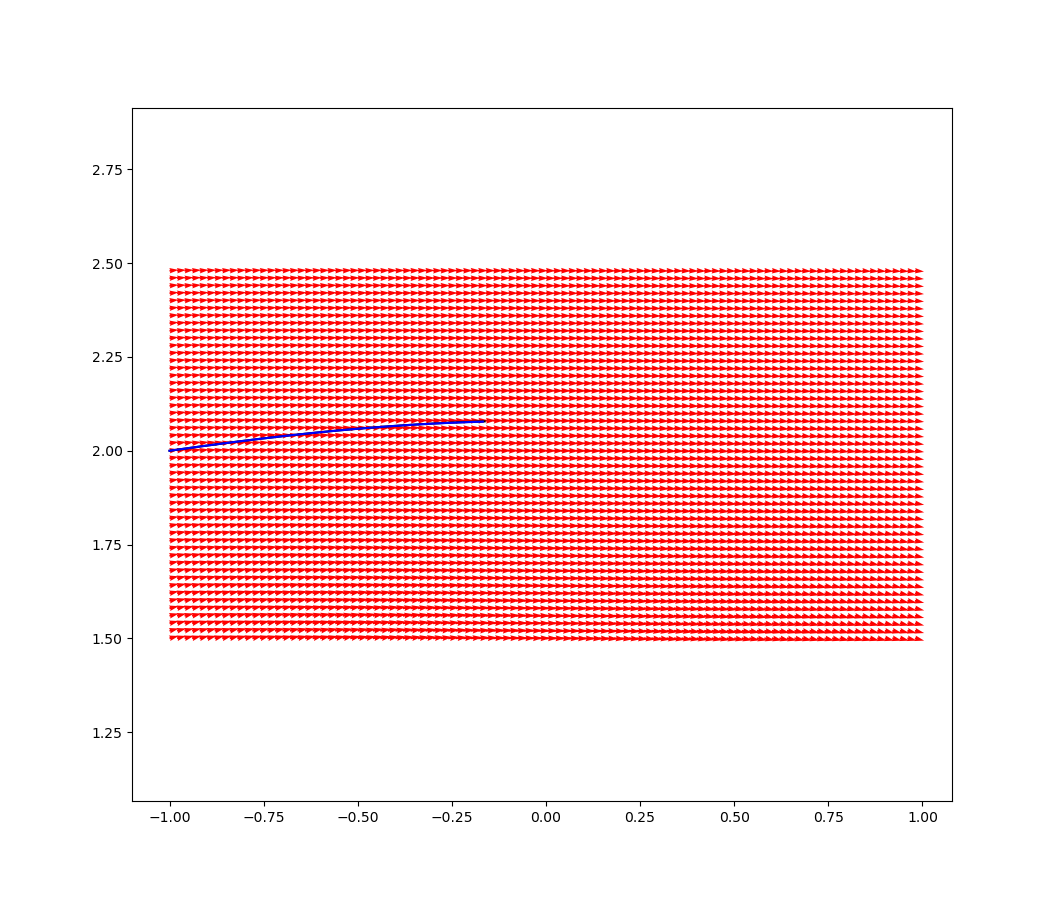

In [112]:
plt.figure()

plt.plot(x_diff[:,0],x_diff[:,1],'k')
plt.plot(X_vals[:,0],X_vals[:,1],'b')

x_grid = np.arange(-1.0,1.0,0.02)
y_grid = np.arange(1.5,2.5,0.02)

X_grid,Y_grid = np.meshgrid(x_grid,y_grid)

U, V = F_eval([X_grid,Y_grid])
plt.quiver(X_grid,Y_grid,U,V,scale=100,color='r')
plt.axis("equal")
plt.show()

In [41]:
(0.895164-0.811189)**2+(2.0152-1.96692)**2

0.009382759024999996

In [113]:
np.linalg.norm(x_diff[-1] - X_vals[-1])

0.004811059116928907

In [69]:

X_vals[-1]

array([0.52788109, 2.05891786])